# GLD Shares Price Predictor Model - Durgesh
SPDR Gold Shares (GLD)
NYSEArca - Nasdaq Real Time Price. Currency in USD <br/>
@author: https://github.com/D4Techs


# 1. Import Libraries and Dataset 
<ol>
    <li> Dataset URL: https://query1.finance.yahoo.com/v7/finance/download/GLD?period1=1579273535&period2=1610895935&interval=1d&events=history&includeAdjustedClose=true </li>
    <li> Yahoo: https://finance.yahoo.com/quote/gld/history?ltr=1 </li> 
</ol>

In [1]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
Df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/GLD?period1=1453075200&period2=1610928000&interval=1d&events=history&includeAdjustedClose=true")
print( "Shape is: " + str( Df.shape) )
Df['Date'] = pd.to_datetime(Df['Date'])
Df.head()

Shape is: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-19,104.059998,104.449997,103.650002,103.980003,103.980003,4588400
1,2016-01-20,105.169998,106.160004,104.940002,105.370003,105.370003,10120900
2,2016-01-21,104.989998,105.489998,104.519997,105.489998,105.489998,5425000
3,2016-01-22,104.930000,105.510002,104.760002,105.000000,105.000000,4185300
4,2016-01-25,105.760002,106.089996,105.599998,106.080002,106.080002,6819400


# 2. Visualization & Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BEC6B28828>,
      dtype=object)

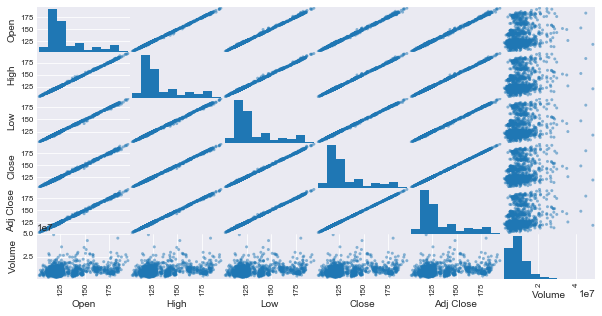

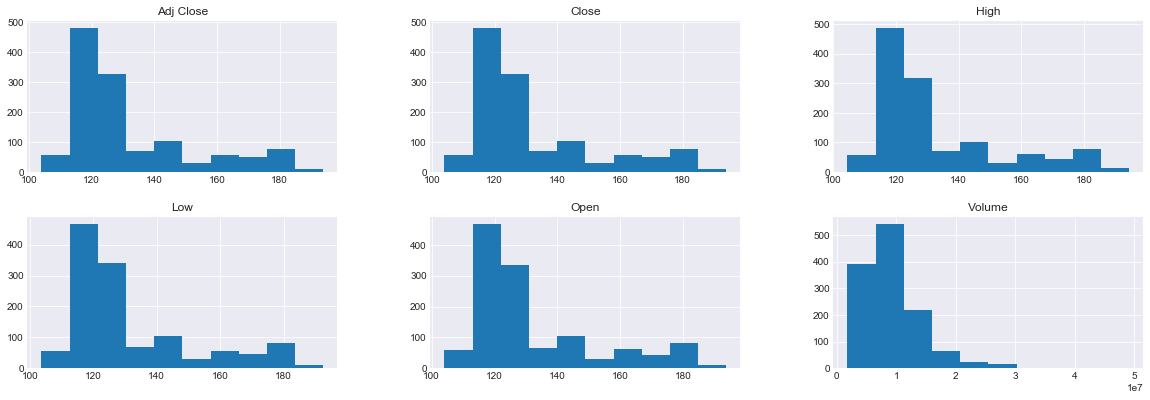

In [3]:
pd.scatter_matrix(Df, figsize=(10,5) )
Df.hist(sharex=False, sharey=False, layout=(3, 3), bins=10, figsize=(20,10))

# 2.1 Adding new columns
<li> S_3: Mean of 3 days </li>
<li> S_9: Mean of 9 days </li>
<li> <b> Output(y) </b> next_day_price: Price of last day CLOSE (Shift -1) <i>will not provide as input </i> </li>

In [4]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
Df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,S_3,next_day_price
2,2016-01-21,104.989998,105.489998,104.519997,105.489998,105.489998,5425000,104.946668,105.000000
3,2016-01-22,104.930000,105.510002,104.760002,105.000000,105.000000,4185300,105.286667,106.080002
4,2016-01-25,105.760002,106.089996,105.599998,106.080002,106.080002,6819400,105.523333,107.290001
5,2016-01-26,106.320000,107.430000,106.260002,107.290001,107.290001,8443400,106.123334,107.690002
6,2016-01-27,106.860001,107.930000,106.650002,107.690002,107.690002,8273400,107.020002,106.540001


## 2.2 Visualizing "FULL" dataset
In full view we can't see little error as below and model looks accurate even if it's not.

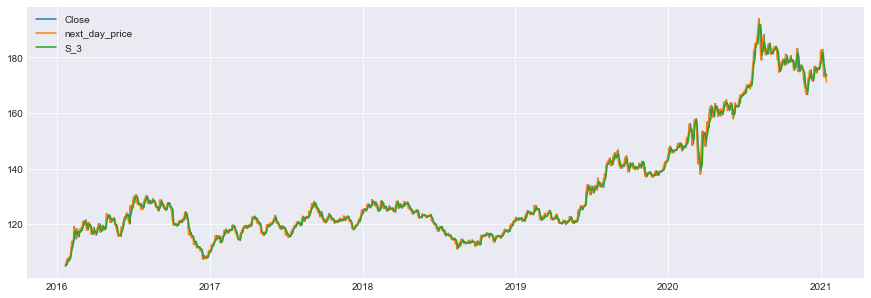

In [5]:
#Comparing FULL Close vs Next_Day_Close in current dataset
plt.figure(figsize=(15,5))
plt.plot(Df["Date"], Df["Close"])
plt.plot(Df["Date"], Df["next_day_price"])
plt.plot(Df["Date"], Df["S_3"])
plt.legend()

## 2.3 Visualizing "Last_30_Days" dataset
So we'll look deeply in this by selecting low data volume (last 60 days) and you can clearly see errors as below.

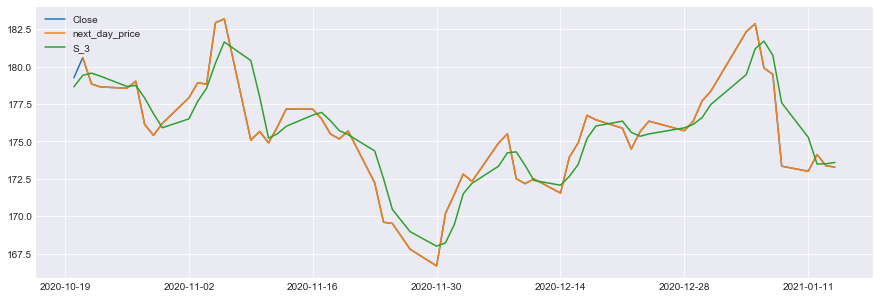

In [6]:
#Comparing Last 30 DAYS Close vs Next_Day_Close in current dataset
plt.figure(figsize=(15,5))
Df_sample = Df.tail(60)
plt.plot(Df_sample["Date"], Df_sample["Close"])
plt.plot(Df_sample["Date"], Df_sample["next_day_price"].shift(1)) #shift because price is for next_day
plt.plot(Df_sample["Date"], Df_sample["S_3"])
plt.legend()

# 3. Model Building
Let's rock and build some models to predict something.
If <b>random_state = 42</b> then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets (<i> can use documentation purpose </i>)

In [7]:
# Define dependent & independent variable
X = Df[["Open","High","Low","Close","Adj Close","Volume","S_3"]]
y = Df['next_day_price']

# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# test_size = 70%
t = int(0.7 *len(Df))

# Train & Test dataset
#X_train, y_train = X[:t], y[:t]
#X_test, y_test = X[t:], y[t:]

In [8]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

print("Linear Regression model equation is: \n")
print("Gold ETF Price (y) =\n %.2f * Open +\n %.2f * High +\n %.2f * Low +\n %.2f * Close +\n %.2f * Adj Close \
+\n %.2f * Volume +\n %.2f * 3 Days Moving Average (x1) +\n %.2f (constant)" \
      % (linear.coef_[0], linear.coef_[1], linear.coef_[2], linear.coef_[3], linear.coef_[4], linear.coef_[5], \
         linear.coef_[6], linear.intercept_))

Linear Regression model equation is: 

Gold ETF Price (y) =
 -0.23 * Open +
 0.15 * High +
 0.18 * Low +
 0.44 * Close +
 0.44 * Adj Close +
 0.00 * Volume +
 0.02 * 3 Days Moving Average (x1) +
 0.10 (constant)


In [9]:
print(linear.coef_, linear.intercept_)
Df.head()

[-2.33502449e-01  1.52258831e-01  1.84009265e-01  4.36193546e-01
  4.36193546e-01  6.06139541e-09  2.42491712e-02] 0.09548180817935759


,Date,Open,High,Low,Close,Adj Close,Volume,S_3,next_day_price
2,2016-01-21,104.989998,105.489998,104.519997,105.489998,105.489998,5425000,104.946668,105.000000
3,2016-01-22,104.930000,105.510002,104.760002,105.000000,105.000000,4185300,105.286667,106.080002
4,2016-01-25,105.760002,106.089996,105.599998,106.080002,106.080002,6819400,105.523333,107.290001
5,2016-01-26,106.320000,107.430000,106.260002,107.290001,107.290001,8443400,106.123334,107.690002
6,2016-01-27,106.860001,107.930000,106.650002,107.690002,107.690002,8273400,107.020002,106.540001


## 3.1 Creating Df_predicted dataset:
<li> To store & analyse only Predicted_values </li>
<li> We'll remove Train data and only keep Test data ROWS </li>

In [10]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

Df_predicted = Df #copy data from original Dataset
Df_predicted["predicted_price"] = predicted_price #add predicted_price as New_Column
Df_predicted.dropna(inplace=True)

Df_predicted.head()

,Date,Open,High,Low,Close,Adj Close,Volume,S_3,next_day_price,predicted_price
3,2016-01-22,104.930000,105.510002,104.760002,105.000000,105.000000,4185300,105.286667,106.080002,105.114838
7,2016-01-28,106.550003,106.860001,106.480003,106.540001,106.540001,5914200,107.173335,106.949997,106.658316
11,2016-02-03,107.910004,109.580002,107.900002,109.250000,109.250000,15785200,108.463333,110.570000,109.471471
12,2016-02-04,110.449997,110.699997,109.919998,110.570000,110.570000,13213700,109.303332,112.320000,110.576937
19,2016-02-16,116.000000,116.309998,114.739998,114.769997,114.769997,14601700,117.396665,115.480003,114.890787


## 3.2 "FULL": Predicted Price vs Actual next_day_price Graph
Same for this one, error is not visible in full scale, we'll zoom in next step to verify.

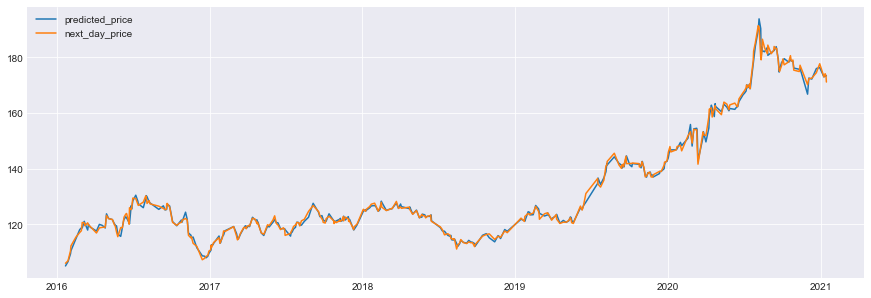

In [11]:
plt.figure(figsize=(15,5))
plt.plot(Df_predicted["Date"], Df_predicted["predicted_price"])
plt.plot(Df_predicted["Date"], Df_predicted["next_day_price"])
plt.legend()
plt.show()

## 3.3 "Last 30 rows": Predicted Price vs Actual 'next_day_price' Graph
Same for this one, error is visible in small data size.

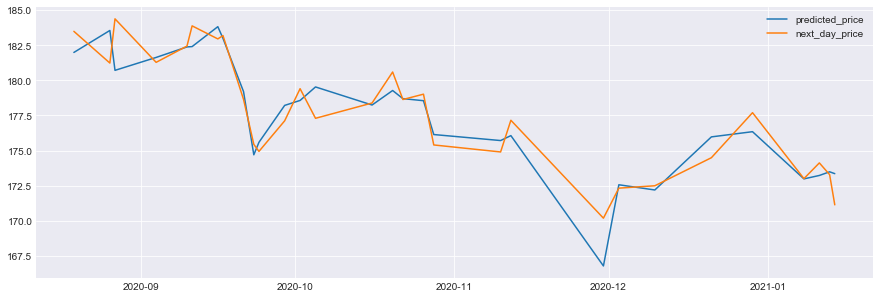

In [12]:
plt.figure(figsize=(15,5))
plt.plot(Df_predicted.tail(30)["Date"], Df_predicted.tail(30)["predicted_price"])
plt.plot(Df_predicted.tail(30)["Date"], Df_predicted.tail(30)["next_day_price"])
plt.legend()
plt.show()

# 4. Model Accuracy Test

In [13]:
# R square
#r2_score = linear.score(X[t:], y[t:])*100
r2_score = linear.score(X_test, y_test)*100
print("Linear Regression Model Accuracy: " + str( float("{0:.2f}".format(r2_score)) ) +"%")

from sklearn import metrics # calculate MAE, MSE, RMSE
# Here predicted_price = y_predict
print(metrics.mean_absolute_error(y_test, predicted_price))
print(metrics.mean_squared_error(y_test, predicted_price))
print(np.sqrt(metrics.mean_squared_error(y_test, predicted_price)))

Linear Regression Model Accuracy: 99.63%
0.8463049333208607
1.6175377765788181
1.2718245856165928


## 4.1 Error = next_day_price - predicted_price
<li> Positive values = we made profit than predicted </li>
<li> Negative values = We has loss than predicted </li>

count    377.000000
mean       0.017536
std        1.273394
min      -10.381982
25%       -0.627521
50%        0.019079
75%        0.587509
max        5.747034
dtype: float64

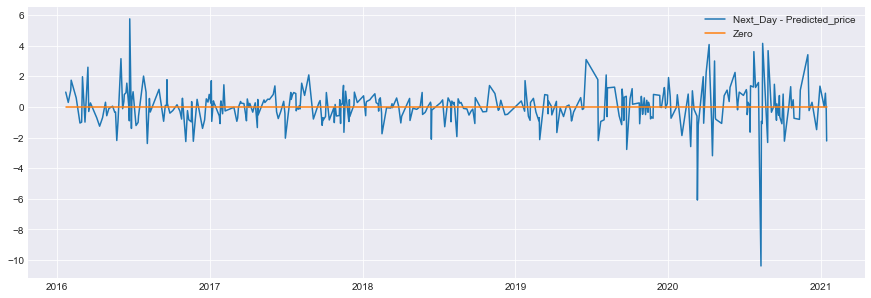

In [14]:
Df_new = Df_predicted["next_day_price"] - Df_predicted["predicted_price"]

plt.figure(figsize=(15,5))
plt.plot(Df["Date"], Df_new)
plt.plot(Df["Date"], 0 * Df_new)
plt.legend(["Next_Day - Predicted_price", "Zero"])
Df_new.describe()

# 5. Create new Datamodel to decide wheather to action or not on gold.
<b>Columns:</b> (price, predicted_price_next_day, actual_price_next_day, gold_returns, signal, strategy_returns)

In [15]:
#create new datamodel (price, predicted_price_next_day, actual_price_next_day, gold_returns, signal, strategy_returns)
# to decide wheather to action or not on gold.

#t = sample size from dataset
t = int(0.8*len(Df))

gold = pd.DataFrame()

gold['Date'] = Df[t:]['Date']
gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold['strategy_returns'] = gold.signal * gold['gold_returns']

print("Gold Datset Shape: " + str( (gold.shape) ) )
gold.tail()

Gold Datset Shape: (76, 7)


,Date,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal,strategy_returns
1246,2020-12-29,176.350006,176.345335,177.699997,-0.017068,1,-0.017068
1253,2021-01-08,173.339996,172.980921,173.000000,-0.001961,0,-0.000000
1254,2021-01-11,173.000000,173.224999,174.119995,0.002139,1,0.002139
1256,2021-01-13,173.369995,173.485083,173.279999,-0.000519,1,-0.000519
1257,2021-01-14,173.279999,173.353005,171.130005,NaN,0,NaN


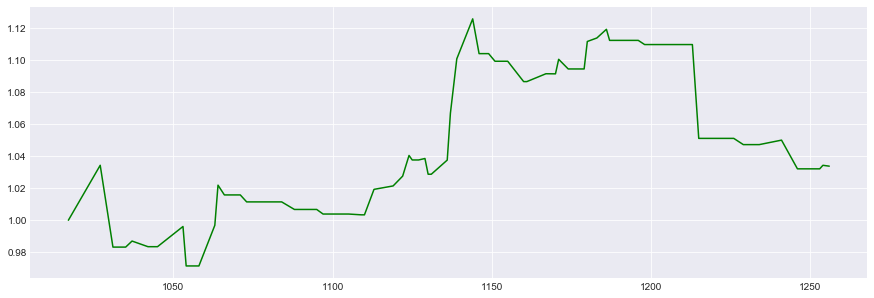

In [16]:
# IF we follow this strategy THEN we'll get profit as below graph:
#plt.ylabel('Cumulative Returns')
((gold['strategy_returns']+1).cumprod()).plot( figsize=(15,5),color='g')
plt.show()

Sharpe Ratio 0.64


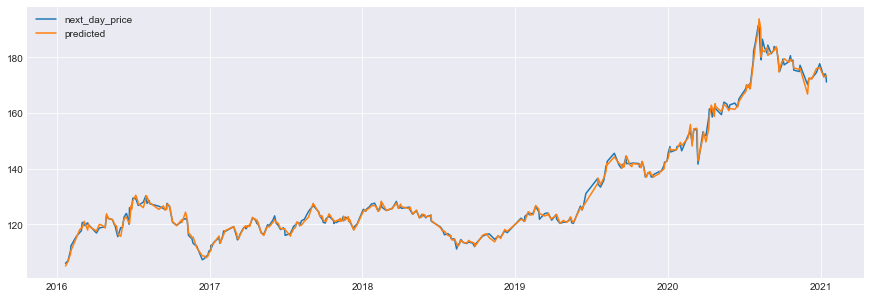

In [17]:
print('Sharpe Ratio %.2f' % (gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)) )

Df["predicted"] = linear.predict(Df[ ["Open","High","Low","Close","Adj Close","Volume","S_3"] ] )
Df["Diff"] = Df["predicted"] - Df["Close"]

plt.figure(figsize=(15,5))
plt.plot(Df["Date"], Df["next_day_price"])
plt.plot(Df["Date"], Df["predicted"])
plt.legend()
plt.show()

# 6. Summary Code
Main Code (Removed Analysis, Test, Graph, etc.)

Imported GLD Dataset shape is: (1259, 7)
           Date        Open        High         Low       Close   Adj Close  \
1243 2020-12-23  175.100006  176.210007  175.059998  175.649994  175.649994   
1245 2020-12-28  177.259995  177.910004  175.630005  175.710007  175.710007   
1247 2020-12-30  176.440002  177.720001  176.440002  177.699997  177.699997   
1248 2020-12-31  178.070007  178.399994  177.320007  178.360001  178.360001   
1249 2021-01-04  181.970001  182.399994  180.960007  182.330002  182.330002   

        Volume         S_3         S_9  next_day_price  predicted_price  
1243   6542800  175.340001  174.674445      176.350006       175.844380  
1245   7778700  175.903336  175.566669      176.350006       175.765813  
1247   5914000  176.586670  176.145559      178.360001       177.833818  
1248   7537200  177.470001  176.325558      182.330002       178.415553  
1249  14331400  179.463333  176.980003      182.869995       182.318080  
Linear Regression Model Accuracy: 99.63%

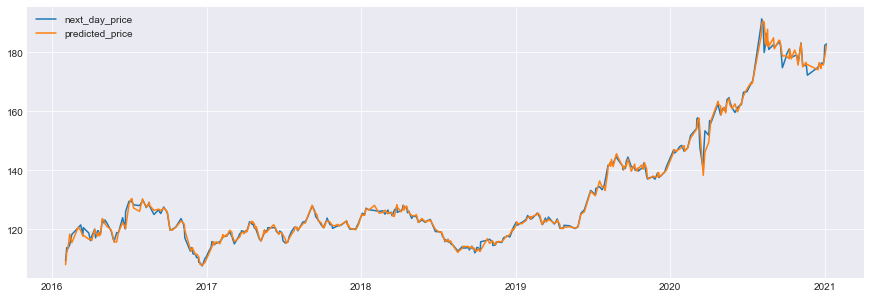

Gold Datset Shape: (124, 7)


,Date,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal,strategy_returns
1243,2020-12-23,175.649994,175.844380,176.350006,0.000342,1,0.000342
1245,2020-12-28,175.710007,175.765813,176.350006,0.011325,0,0.000000
1247,2020-12-30,177.699997,177.833818,178.360001,0.003714,1,0.003714
1248,2020-12-31,178.360001,178.415553,182.330002,0.022258,1,0.022258
1249,2021-01-04,182.330002,182.318080,182.869995,NaN,1,NaN


In [18]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Df = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/GLD?period1=1453075200&period2=1610928000&interval=1d&events=history&includeAdjustedClose=true")
print( "Imported GLD Dataset shape is: " + str( Df.shape) )
Df['Date'] = pd.to_datetime(Df['Date'])

# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()

# Define dependent & independent variable
X = Df[["Open","High","Low","Close","Adj Close","Volume","S_3","S_9"]]
y = Df['next_day_price']

# Split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)

# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index=y_test.index, columns=['price'])

Df_predicted = Df #copy data from original Dataset
Df_predicted["predicted_price"] = predicted_price #add predicted_price as New_Column
Df_predicted.dropna(inplace=True)
print( Df_predicted.tail() )

# R square
r2_score = linear.score(X[t:], y[t:])*100
print("Linear Regression Model Accuracy: " + str( float("{0:.2f}".format(r2_score)) ) +"% \n\n")

plt.figure(figsize=(15,5))
plt.plot(Df_predicted["Date"], Df_predicted["next_day_price"])
plt.plot(Df_predicted["Date"], Df_predicted["predicted_price"])
plt.legend()
plt.show()

#create new datamodel (price, predicted_price_next_day, actual_price_next_day, gold_returns, signal, strategy_returns)
# to decide wheather to action or not on gold.

#t = sample size from dataset
t = int(0.7*len(Df))

gold = pd.DataFrame()

gold['Date'] = Df[t:]['Date']
gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold['strategy_returns'] = gold.signal * gold['gold_returns']

print("Gold Datset Shape: " + str( (gold.shape) ) )
gold.tail()